In [1]:
# imports
import pathlib
import tarfile
import pandas as pd
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

## Downloading the data

In [2]:
def load_housing_data() -> pd.DataFrame:
    """
        Automatically downloads the latest version of the housing data of California 1990
     
    Returns:
        the housing data of California 1990 as CSV
    """
    
    path = pathlib.Path("datasets/housing.tgz")
    
    # Checks if the file exists
    if not path.is_file():
        
        # Create datasets folder in the current directory
        pathlib.Path('datasets').mkdir(parents=True, exist_ok=True)
        
        # The location of the data
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        
        # The retrieval of the data
        urllib.request.urlretrieve(url, path)
        
        # The unpacking of the data
        with tarfile.open(path) as housing_data:
            housing_data.extractall(path='datasets')
            
    return pd.read_csv(pathlib.Path('./datasets/housing/housing.csv'))


housing = load_housing_data()

## Data Inspection

In [3]:
## The first 5 rows of the data
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
## The data types of the columns + how many values are non-valued 
print(housing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [5]:
## A simple overview to see the distribution of numerical values in the dataset
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


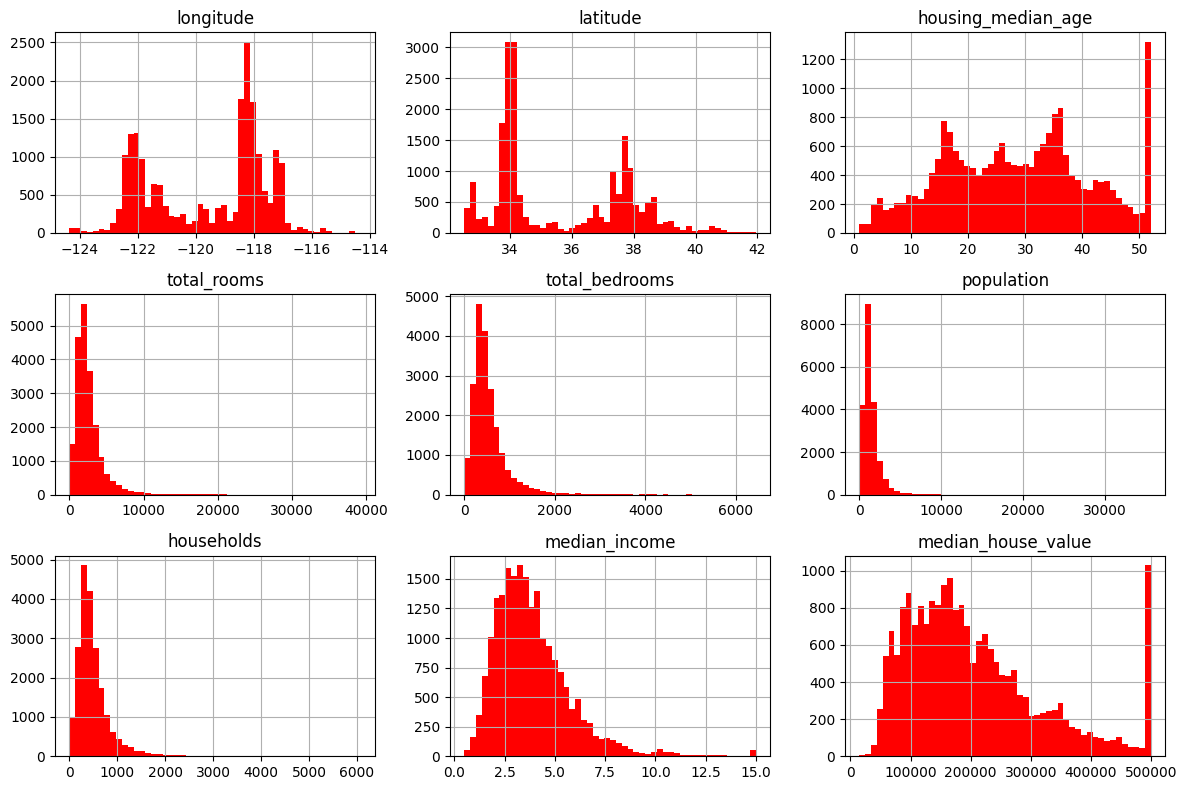

In [6]:
## Instead of a numerical overview, we can also visualize the data.
## Often this give a way better overview of the distribution of the data

housing.hist(bins=50, figsize=(12, 8), color = 'red')

plt.tight_layout()
plt.show()

## Creating a Test set

In [7]:
def shuffle_and_split_data(data: pd.DataFrame, test_ratio: float) -> tuple[pd.DataFrame, pd.DataFrame]:
    """
    
    This function splits the data into a training and a testing set.
    
    Args:
        data (Dataframe): All the data
        test_ratio (float): the ratio that should end up in the testing set

    Returns:
        a tuple consisting of two dataframes. One for the training data, the other for testing.
    """
    
    np.random.seed(42)
    
    m = data.shape[0]
    
    random_indices = np.random.permutation(m)
    
    cutoff_index = int(test_ratio * m)
    
    train_indices, test_indices = random_indices[cutoff_index:], random_indices[:cutoff_index]
    
    return data.iloc[train_indices], data.iloc[test_indices]


In [8]:
# We can also simplify the split function by using the built-in function of Scikit learn
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


In [9]:
# you can "pd.cut" to categorise values into predefined bins.
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])


In [10]:
# We can also apply a stratified shuffle. By doing so, we keep the ratio's of the training set equal to the testing set, given specific column(s).
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42, stratify=housing['income_cat'])

display('train', train_set["income_cat"].value_counts(normalize=True).sort_index())
display('test', test_set["income_cat"].value_counts(normalize=True).sort_index())

'train'

income_cat
1    0.039789
2    0.318859
3    0.350594
4    0.176296
5    0.114462
Name: proportion, dtype: float64

'test'

income_cat
1    0.039971
2    0.318798
3    0.350533
4    0.176357
5    0.114341
Name: proportion, dtype: float64

# Data exploration

In [11]:
housing = train_set.drop(columns=['income_cat'], axis=1).copy()

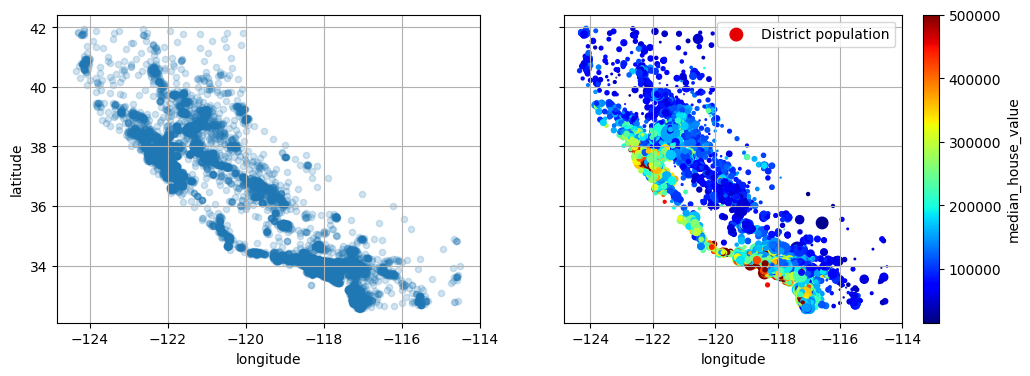

In [12]:
# Simple graph

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (12,4), sharey = True)

housing.plot(kind = 'scatter', ax=axes[0], x = 'longitude', y = 'latitude', grid = True, alpha = 0.2)
housing.plot(kind = 'scatter', ax=axes[1], x = 'longitude', y = 'latitude', grid = True, s = housing['population'] / 100, label = 'District population', c = 'median_house_value', cmap = 'jet', colorbar = True, legend = True )

plt.show()

# Data Cleaning

In [13]:
# Start with a clean dataset
housing = train_set.drop("median_house_value", axis=1)
housing_labels = train_set["median_house_value"].copy()

In [14]:
""" Now we focus on imputing missing values of our numerical columns """
from sklearn.impute import  SimpleImputer

imputer = SimpleImputer(strategy='median')

In [15]:
""" This is a neat trick to filter out the numerical values """
housing_numeric = housing.select_dtypes(include=np.number)

housing_numeric

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


In [16]:
imputer.fit(housing_numeric)

imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [17]:
X = imputer.transform(housing_numeric)

In [27]:
""" Now we now focus on the categorical variables """
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

housing_cat = housing[['ocean_proximity']]

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot.toarray()


array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])